In [ ]:
# import libraries
from bs4 import BeautifulSoup # webscraping
import requests # get html code of website
import pandas as pd # work with data after collection

In [ ]:
[# step 1: collect the website information
url = "https://www.airlinequality.com/airline-reviews/british-airways" # website we are going scrape
website = requests.get(url).content

In [ ]:
# use beautifulsoup to get relevant data
soup = BeautifulSoup(website, 'lxml')

In [ ]:
soup

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]--><!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]--><!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]--><!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]--><!--[if gt IE 8]><!--><html lang="en-GB"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>British Airways Customer Reviews - SKYTRAX</title>
<!-- Google Chrome Frame for IE -->
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<!-- mobile meta -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<!-- icons & favicons -->
<link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-icon-touch.png" rel="apple-touch-ic

In [ ]:
# get review text
review_text = soup.find_all(class_='text_content ')
for review in review_text:
  print(review.text)

✅ Trip Verified | Excellent service both on the ground and on board - while their first class product might not be leading edge, the service around the entire experience was well worth the cost of the ticket. The Concorde room at Heathrow is well managed and a great place to relax prior to the trip. Flight was slightly delayed out of Heathrow but arrived on schedule in Johannesburg.
✅ Trip Verified |  Good lounge at Cape Town. On time departure. Drinks high quality. Sound dinner service. Breakfast reasonable. Arrival lounge was good but showers cold.
✅ Trip Verified |  A really excellent journey. Lounge not overcrowded in late afternoon, plenty of edible food. Easy boarding. New Club World Suites great and compared to when we last travelled in them a year ago food and drink back to previous standards- choice of individual wines rather than bland blends, courses served individually with cut glass and china. Beef cheek really tasty as was a surprisingly good soup. Crew excellent. Good ch

In [ ]:
# get rating value
ratings = soup.find_all('span', attrs={'itemprop':'ratingValue'})

for rating in ratings[1:]:
  print(rating.text)

9
9
9
2
3
2
9
9
1
3


In [ ]:
# Find all the td tags with class 'review-rating-header cabin_flown ' and text 'Seat Type'
td_tags = soup.find_all("td", class_="review-rating-header cabin_flown ", string="Seat Type")

# Iterate over the td tags
for td_tag in td_tags:
    # Find the parent tr tag of the current td tag
    tr_tag = td_tag.find_parent("tr")

    # Find the specific td tag with class 'review-value' that is a child of the above tr tag
    td_value_tag = tr_tag.find("td", class_="review-value")

    # Print the text contents of the td_value_tag
    print(td_value_tag.text)

First Class
Business Class
Business Class
Business Class
Economy Class
Economy Class
Economy Class
Business Class
Economy Class
Premium Economy


In [ ]:
# get recommended
td_tags = soup.find_all("td", class_="review-rating-header recommended", string="Recommended")
for td_tag in td_tags:
  tr_tag = td_tag.find_parent("tr")
  td_value_tag = tr_tag.find("td", class_="review-value")
  print(td_value_tag.text)

no
no
no
no
no
yes
no
no
no
no


In [ ]:
# get value for money
td_tags = soup.find_all("td", class_="review-rating-header value_for_money", string="Value For Money")
for td_tag in td_tags:
  tr_tag = td_tag.find_parent("tr")
  td_value_tag = tr_tag.find("td", class_="review-value")
  print(td_value_tag)

None
None
None
None
None
None
None
None
None
None


In [ ]:
# Find all the td tags with class 'review-rating-header' and text 'Value For Money'
td_tags = soup.find_all("td", class_="review-rating-header value_for_money", string="Value For Money")

# Iterate over the td tags
for td_tag in td_tags:
    # Find the next td tag which contains the stars
    next_td_tag = td_tag.find_next_sibling()
    # Find all the span tags with class 'star fill'
    span_tags = next_td_tag.find_all("span", class_="star fill")
    # Get the number of filled stars
    number_of_stars = len(span_tags)
    # Print the number of filled stars
    print(number_of_stars)

4
4
4
1
2
1
5
4
1
1


In [ ]:
# Find all the div tags with itemprop attribute 'reviewRating'
review_rating_divs = soup.find_all("div", itemprop="reviewRating")

# Initialize an empty list to store the ratingValues
ratingValues = []

# Iterate over the div tags
for review_rating_div in review_rating_divs:
    # Find the span tag with itemprop attribute 'ratingValue' within the current div tag
    rating_value_span = review_rating_div.find("span", itemprop="ratingValue")
    # Append the text inside the span tag to the ratingValues list
    ratingValues.append(rating_value_span.text)

print(ratingValues)

['9', '9', '9', '2', '3', '2', '9', '9', '1', '3']


 write a for loop to loop through all pages

In [ ]:
# there are 347 links total
total_reviews = []
total_ratings = []
total_seat_type = []
total_recommended = []
total_value_for_money = []

for link in range(1,348):
  # get link 
  url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{link}/"

  # get content
  website = requests.get(url).content

  # use beautifulsoup to parse data
  soup = BeautifulSoup(website, 'lxml')

  # get review text
  review_text = soup.find_all(class_='text_content ')
  for review in review_text:
    total_reviews.append(review.text)

  # get rating value out of 10
  ratings = soup.find_all('span', attrs={'itemprop':'ratingValue'})
  for rating in ratings[1:]:
    total_ratings.append(rating.text)

  # get seat type
  td_tags = soup.find_all("td", class_="review-rating-header cabin_flown ", string="Seat Type")
  for td_tag in td_tags:
      tr_tag = td_tag.find_parent("tr")
      td_value_tag = tr_tag.find("td", class_="review-value")
      total_seat_type.append(td_value_tag.text)

  # get recommended
  td_tags = soup.find_all("td", class_="review-rating-header recommended", string="Recommended")
  for td_tag in td_tags:
    tr_tag = td_tag.find_parent("tr")
    td_value_tag = tr_tag.find("td", class_="review-value")
    total_recommended.append(td_value_tag.text)

  # get value for money out of 5 stars
  td_tags = soup.find_all("td", class_="review-rating-header value_for_money", string="Value For Money")
  for td_tag in td_tags:
      next_td_tag = td_tag.find_next_sibling()
      span_tags = next_td_tag.find_all("span", class_="star fill")
      number_of_stars = len(span_tags)
      total_value_for_money.append(number_of_stars)

  print(f'done {link}')

dictionary = {'Review': total_reviews, 'Rating': total_ratings, 'Seat Type': total_seat_type, 'Recommended': total_recommended, 'Value For Money': total_value_for_money}
df = pd.DataFrame(dictionary)

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 100
done 101
done 102
done 103
done 104
done 105
done 106
done 107
done 108
done 109
done 110
done 111
done 112
done 113
done 114
done 115
done 116
done 117
done 118
done 119
done 120
done 121
done 122
done 123
d

ValueError: ignored

In [ ]:
df

,Review,Rating,Seat Type,Recommended,Value For Money
0,✅ Trip Verified | Excellent service both on th...,9,First Class,yes,4
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,Business Class,yes,4
2,✅ Trip Verified | A really excellent journey....,9,Business Class,yes,4
3,✅ Trip Verified | This flight was one of the ...,2,Business Class,no,1
4,Not Verified | It seems that there is a race t...,3,Economy Class,no,2
...,...,...,...,...,...
85,✅ Trip Verified | Full afternoon flight. Read...,9,Economy Class,yes,4
86,✅ Trip Verified | I was told I'd require a 48...,1,Business Class,no,1
87,✅ Trip Verified | Having been promised help t...,1,Economy Class,no,1
88,✅ Trip Verified | I am a business class custo...,1,Business Class,no,1


In [ ]:
print(len(total_reviews))
print(len(total_ratings))
print(len(total_seat_type))
print(len(total_recommended))
print(len(total_value_for_money))

3464
3459
3450
3460
3464


In [ ]:
td_tags = soup.find_all("td", class_="review-rating-header cabin_flown ", string="Seat Type")
len(td_tags)

10

Final Scraper

In [1]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd 

# there are 347 links total
total_reviews = []
total_ratings = []
total_seat_type = []
total_recommended = []
total_value_for_money = []

for link in range(1, 348):
  # get link 
  url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{link}/"

  # get content
  website = requests.get(url).content

  # use beautifulsoup to parse data
  soup = BeautifulSoup(website, 'lxml')

  # get review text
  review_text = soup.find_all(class_='text_content ')
  review_rating_divs = soup.find_all("div", itemprop="reviewRating")
  td_tags_seat = soup.find_all("td", class_="review-rating-header cabin_flown ", string="Seat Type")
  td_tags_recommended = soup.find_all("td", class_="review-rating-header recommended", string="Recommended")
  td_tags_value = soup.find_all("td", class_="review-rating-header value_for_money", string="Value For Money")

  # ratings and seat tags were almost all but not all so make sure to only scrape page where each review has all
  if len(review_rating_divs) == len(review_text) and len(td_tags_seat) == len(review_text):
    for review in review_text:
        total_reviews.append(review.text)

    for review_rating_div in review_rating_divs:
        rating_value_span = review_rating_div.find("span", itemprop="ratingValue")
        total_ratings.append(rating_value_span.text)

    for td_tag in td_tags_seat:
        tr_tag = td_tag.find_parent("tr")
        td_value_tag = tr_tag.find("td", class_="review-value")
        total_seat_type.append(td_value_tag.text)

    for td_tag in td_tags_recommended:
        tr_tag = td_tag.find_parent("tr")
        td_value_tag = tr_tag.find("td", class_="review-value")
        total_recommended.append(td_value_tag.text)

    for td_tag in td_tags_value:
        next_td_tag = td_tag.find_next_sibling()
        span_tags = next_td_tag.find_all("span", class_="star fill")
        number_of_stars = len(span_tags)
        total_value_for_money.append(number_of_stars)

  if link % 10 == 0:
    print(f'done {link}')

dictionary = {'Review': total_reviews, 'Rating': total_ratings, 'Seat Type': total_seat_type, 'Recommended': total_recommended, 'Value For Money': total_value_for_money}
df = pd.DataFrame(dictionary)

# save data to csv
df.to_csv('BA_reviews.csv')

done 10
done 20
done 30
done 40
done 50
done 60
done 70
done 80
done 90
done 100
done 110
done 120
done 130
done 140
done 150
done 160
done 170
done 180
done 190
done 200
done 210
done 220
done 230
done 240
done 250
done 260
done 270
done 280
done 290
done 300
done 310
done 320
done 330
done 340


Data Cleaning

In [2]:
df = pd.read_csv('BA_reviews.csv')
df

,Unnamed: 0,Review,Rating,Seat Type,Recommended,Value For Money
0,0,✅ Trip Verified | Excellent service both on th...,9,First Class,yes,4
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,Business Class,yes,4
2,2,✅ Trip Verified | A really excellent journey....,9,Business Class,yes,4
3,3,✅ Trip Verified | This flight was one of the ...,2,Business Class,no,1
4,4,Not Verified | It seems that there is a race t...,3,Economy Class,no,2
...,...,...,...,...,...,...
3379,3379,YYZ to LHR - July 2012 - I flew overnight in p...,8,Premium Economy,yes,4
3380,3380,LHR to HAM. Purser addresses all club passenge...,9,Business Class,yes,3
3381,3381,My son who had worked for British Airways urge...,5,Economy Class,yes,4
3382,3382,London City-New York JFK via Shannon on A318 b...,4,Premium Economy,no,1


In [3]:
# get rid of unnamed: 0
df = df.drop(columns=['Unnamed: 0'])
df

,Review,Rating,Seat Type,Recommended,Value For Money
0,✅ Trip Verified | Excellent service both on th...,9,First Class,yes,4
1,✅ Trip Verified | Good lounge at Cape Town. O...,9,Business Class,yes,4
2,✅ Trip Verified | A really excellent journey....,9,Business Class,yes,4
3,✅ Trip Verified | This flight was one of the ...,2,Business Class,no,1
4,Not Verified | It seems that there is a race t...,3,Economy Class,no,2
...,...,...,...,...,...
3379,YYZ to LHR - July 2012 - I flew overnight in p...,8,Premium Economy,yes,4
3380,LHR to HAM. Purser addresses all club passenge...,9,Business Class,yes,3
3381,My son who had worked for British Airways urge...,5,Economy Class,yes,4
3382,London City-New York JFK via Shannon on A318 b...,4,Premium Economy,no,1


In [4]:
# split reviews into verified and review body
def verification(row):
  if '|' in row:
    split_row = row.split('|')
    return pd.Series({'Verified':split_row[0], 'Reviews':split_row[1]})
  else:
    return pd.Series({'Verified':'Not Verified', 'Reviews':row})

In [5]:
df[['Verified','Reviews']] = df['Review'].apply(verification)

In [6]:
# clean up verified row
def clean_up_verified(row):
  if '✅ Trip Verified' in row:
    return 'Yes'
  else:
    return 'No'

In [7]:
df['Verified'] = df['Verified'].apply(clean_up_verified)

In [8]:
df = df[['Verified', 'Reviews', 'Seat Type', 'Rating', 'Value For Money', 'Recommended']]
df

,Verified,Reviews,Seat Type,Rating,Value For Money,Recommended
0,Yes,Excellent service both on the ground and on b...,First Class,9,4,yes
1,Yes,Good lounge at Cape Town. On time departure....,Business Class,9,4,yes
2,Yes,A really excellent journey. Lounge not overc...,Business Class,9,4,yes
3,Yes,This flight was one of the worst I have ever...,Business Class,2,1,no
4,No,It seems that there is a race to the bottom a...,Economy Class,3,2,no
...,...,...,...,...,...,...
3379,No,YYZ to LHR - July 2012 - I flew overnight in p...,Premium Economy,8,4,yes
3380,No,LHR to HAM. Purser addresses all club passenge...,Business Class,9,3,yes
3381,No,My son who had worked for British Airways urge...,Economy Class,5,4,yes
3382,No,London City-New York JFK via Shannon on A318 b...,Premium Economy,4,1,no


In [9]:
df = df[df['Value For Money'] != 0]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3383 entries, 0 to 3383
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Verified         3383 non-null   object
 1   Reviews          3383 non-null   object
 2   Seat Type        3383 non-null   object
 3   Rating           3383 non-null   int64 
 4   Value For Money  3383 non-null   int64 
 5   Recommended      3383 non-null   object
dtypes: int64(2), object(4)
memory usage: 185.0+ KB


In [11]:
df.to_csv('BA_reviews_cleaned.csv')

Visualisations

In [12]:
df = pd.read_csv('BA_reviews_cleaned.csv')
df = df.drop(columns=['Unnamed: 0'])

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df

,Verified,Reviews,Seat Type,Rating,Value For Money,Recommended
0,Yes,Excellent service both on the ground and on b...,First Class,9,4,yes
1,Yes,Good lounge at Cape Town. On time departure....,Business Class,9,4,yes
2,Yes,A really excellent journey. Lounge not overc...,Business Class,9,4,yes
3,Yes,This flight was one of the worst I have ever...,Business Class,2,1,no
4,No,It seems that there is a race to the bottom a...,Economy Class,3,2,no
...,...,...,...,...,...,...
3378,No,YYZ to LHR - July 2012 - I flew overnight in p...,Premium Economy,8,4,yes
3379,No,LHR to HAM. Purser addresses all club passenge...,Business Class,9,3,yes
3380,No,My son who had worked for British Airways urge...,Economy Class,5,4,yes
3381,No,London City-New York JFK via Shannon on A318 b...,Premium Economy,4,1,no


Distribution of ratings

In [15]:
df.describe()

,Rating,Value For Money
count,3383.000000,3383.000000
mean,4.803725,2.723322
std,3.160017,1.466865
min,1.000000,1.000000
25%,2.000000,1.000000
50%,4.000000,3.000000
75%,8.000000,4.000000
max,10.000000,5.000000


- Mean almost 5 for ratings
- Mean 2.7/5 for value for money

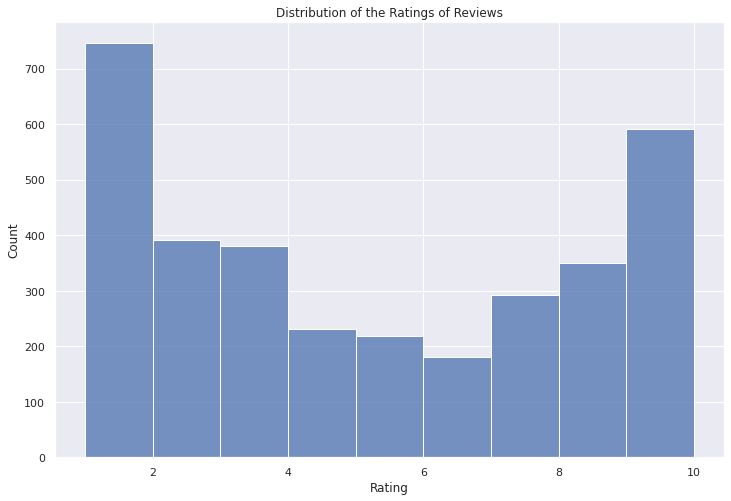

<Figure size 864x576 with 0 Axes>

In [63]:
 sns.set(rc = {'figure.figsize':(12,8)})
 sns.histplot(data=df, x=df['Rating'], binwidth=1, multiple = "stack")
 plt.title('Distribution of the Ratings of Reviews')
 plt.show()
 plt.savefig('plot1.png')

- Majority of ratings lie on either extremities, with the highest being the low reviews. 

How does the rating (score out of 10) vary across seat types

In [64]:
rating_vs_seat_type = df[['Seat Type', 'Rating']].groupby('Seat Type').agg({'Rating': 'mean'})
rating_vs_seat_type

,Rating
Seat Type,
Business Class,5.137590
Economy Class,4.448256
First Class,5.944444
Premium Economy,4.879630


In [65]:
# economy, premium, business, first
rating_vs_seat_type = rating_vs_seat_type.reset_index()
rating_vs_seat_type

,Seat Type,Rating
0,Business Class,5.137590
1,Economy Class,4.448256
2,First Class,5.944444
3,Premium Economy,4.879630


In [66]:
# economy, premium, business, first
rating_vs_seat_type['Order'] = 0
rating_vs_seat_type

,Seat Type,Rating,Order
0,Business Class,5.137590,0
1,Economy Class,4.448256,0
2,First Class,5.944444,0
3,Premium Economy,4.879630,0


In [67]:
def order_classes(value):
  if value == 'Economy Class':
    return 1
  elif value == 'Premium Economy':
    return 2
  elif value == 'Business Class':
    return 3
  else:
    return 4

In [68]:
rating_vs_seat_type['Order'] = rating_vs_seat_type['Seat Type'].apply(order_classes)

In [69]:
rating_vs_seat_type = rating_vs_seat_type.sort_values('Order', ascending=True)
rating_vs_seat_type

,Seat Type,Rating,Order
1,Economy Class,4.448256,1
3,Premium Economy,4.879630,2
0,Business Class,5.137590,3
2,First Class,5.944444,4


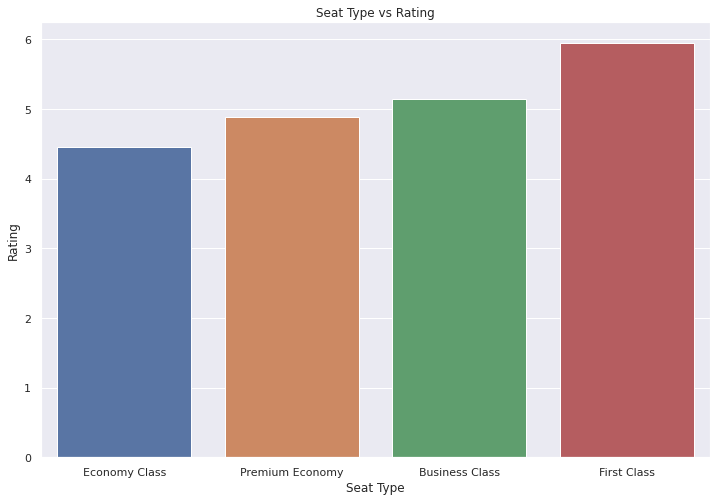

<Figure size 864x576 with 0 Axes>

In [70]:
sns.barplot(data=rating_vs_seat_type, x='Seat Type', y='Rating')
plt.title('Seat Type vs Rating')
plt.show()
plt.savefig('plot2.png')

- The higher the class, the higher the rating of the flight. So, people who pay more, get a better flight experience and hence, leave a better review.

How does the rating vary across value for money scores (score out of 5)

In [71]:
value_for_money = df[['Value For Money', 'Rating']].groupby('Value For Money').agg({'Rating':'mean'}).reset_index()
value_for_money

,Value For Money,Rating
0,1,1.700474
1,2,3.106742
2,3,5.125201
3,4,7.604101
4,5,8.908752


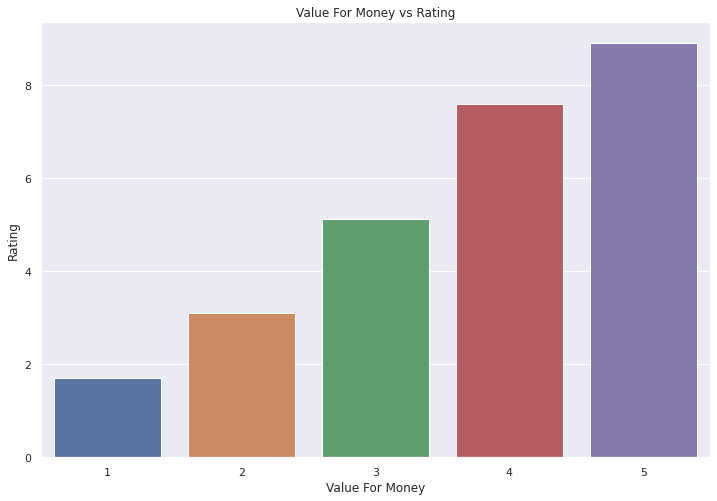

<Figure size 864x576 with 0 Axes>

In [72]:
sns.barplot(data=value_for_money, x='Value For Money', y='Rating')
plt.title('Value For Money vs Rating')
plt.show()
plt.savefig('plot3.png')

- This shows that as the rating increases, people value the flight more

How does the rating vary for verified vs non verified reviews

In [73]:
verified_rating = df[['Verified', 'Rating', 'Seat Type']].groupby(['Verified', 'Seat Type']).agg({'Rating':'mean'}).reset_index()
verified_rating

,Verified,Seat Type,Rating
0,No,Business Class,5.243243
1,No,Economy Class,4.650845
2,No,First Class,5.939597
3,No,Premium Economy,4.949580
4,Yes,Business Class,4.892537
5,Yes,Economy Class,3.950593
6,Yes,First Class,5.959184
7,Yes,Premium Economy,4.686047


In [74]:
verified_rating['Order'] = 0
verified_rating['Order'] = verified_rating['Seat Type'].apply(order_classes)

In [75]:
verified_rating = verified_rating.sort_values('Order', ascending=True)

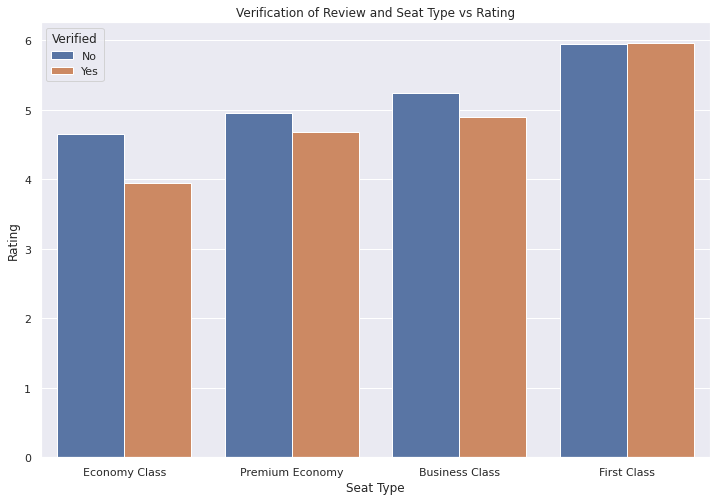

<Figure size 864x576 with 0 Axes>

In [76]:
sns.barplot(data=verified_rating, x='Seat Type', y='Rating', hue='Verified')
plt.title('Verification of Review and Seat Type vs Rating')
plt.show()
plt.savefig('plot4.png')

- There are more verified reviews for the higher classes than there are for the lower classes meaning they are much more reliable as they have been fact checked.
- Typically for each class, more than half of the reviews are unverified whereas for first class, it is almost the same.
- Verified and unverified reviews follow the same pattern so can be reliable.

Recommended flights vs Review Ratings

In [77]:
df[['Rating', 'Recommended']]

,Rating,Recommended
0,9,yes
1,9,yes
2,9,yes
3,2,no
4,3,no
...,...,...
3378,8,yes
3379,9,yes
3380,5,yes
3381,4,no


In [78]:
rating_recommended = df[['Recommended', 'Rating']].groupby(['Rating', 'Recommended']).agg({'Recommended':'count'}).rename(columns={'Recommended': 'Recommended Count'})
rating_recommended = rating_recommended.reset_index()
rating_recommended

,Rating,Recommended,Recommended Count
0,1,no,743
1,1,yes,3
2,2,no,388
3,2,yes,3
4,3,no,376
5,3,yes,5
6,4,no,216
7,4,yes,15
8,5,no,162
9,5,yes,57


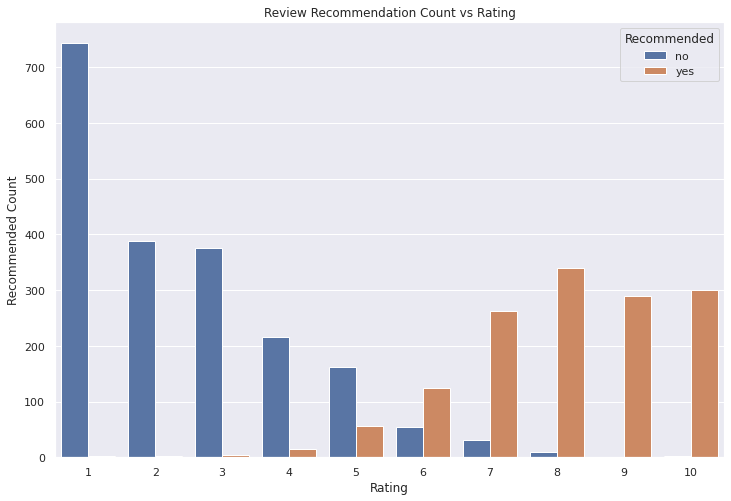

<Figure size 864x576 with 0 Axes>

In [79]:
sns.barplot(data=rating_recommended, x='Rating', y='Recommended Count', hue='Recommended')
plt.title('Review Recommendation Count vs Rating')
plt.show()
plt.savefig('plot5.png')

- As the rating increases, the review recommends the flight.